### [Todo](#Todo_)
### [Description](#Description_)
### [Research](#Research_)
### [Setup](#Setup_)
### [Imports](#Imports_)
### [Config](#Config_)
### [Utils](#Utils_)
### [Data](#Data_)
### [Download](#Download_)
### [Preprocessing](#Preprocessing_)
### [Exploratory data analysis](#Exploratory_data_analysis_)
### [Metrics](#Metrics_)
### [Hand model](#Hand_model_)
### [Hand model loss](#Hand_model_loss_)
### [Dataset](#Dataset_)
### [Model](#Model_)

## Todo <span id=Todo_></span>

1. clean up todo

1. compute sequence quality, filter trashy data, learn to smooth, then cluster on smoothed labels to try to ex

1. use webcam to test online

# compute similarity to cluster via pointwise distance or learned function?
# model: input -> augment -> smooth_sequence -> normalizing_affine_transform -> conformer -> smooth_loss + ctc_loss
# manually model frame x landmark x coordinate with variable frame length fingerletters and let model use them as context
# keep finger point abs coordinates
# pad/truncate all sequences to common length
# don't limit consecutive nans
# smooth out hand model, take smooth hand model at notnan frames, encode as context for transformer cross attention

1. teach model to speak in sign language in parallel to understanding it

1. masked learning

1. filter data: drop 1 frame samples, none samples

1. determine for each participant whether he is right-handed

1. distinguish between stationary and dynamic symbols

1. how to deal with transitions between symbols? If have codebook -> just match, otherwise utilize temporal attention

1. extract codes for each symbol + missing data class + transition class + intentional nothing class

1. how to distinguish word boundaries? Intentional vs unintentional nothing

determine handedness by comparing total hand variation

measure sequence quality by number of frames per letter, percent missing data after clipping inner nan spans, average jitterness by computing deltas

interpolate finger point movement via line with weakly bounded first, second derivative

detect complete finger letter by detecting finger stops / turns

utilize skeletal-muscular model of fingers to determine how fingers can move

initiate learning with simulated finger letters -> incrementally progress to more noisy samples

assign each video quality based on missing / jittering data and train on quality data first

nearest frames interpolate? -> lag predictions? several frames look ahead?

filter data: empty, too sparse, too noisy(jiggly)
learn to smooth out input via masked training

take pretrained bert, limit vocab, train conditional on gestures

can drop out a lot of columns and rows to train on other gpus

different elementwise activations instead of one per layer

what is supplemental data???

train data is prett shitty, consider using extra data

if iterating over data by parquet files -> accumulate grad batches

train model to predict missing frames / smooth out and regularize given frames

check z coordinate consistency

use mediapipe handedness evaluator?

what to do if someone switches hands during phrase?

augment frame rate during training

because person can get closer/further to/from the camera, skeletal sizes are not absolute

feature engineering:
hand orientation/position/speed/acceleration
joint 2d angles for secondary joints, 3d angles for primary
assign parent node, get vector angle from parent node relative to palm plane
get finger point vectors/ coords relative to palm, finger lenghts?
distinguish between letters with velocity/without
how to encode movement?

hand-craft pose token clusters for each letter
look for asl datasets
how to deal with missing values?
determine dominant hand online, transform left hand to right
use catboost to determine feature importance
learn codebook and predict via nearest neighbors
sample each letter individually from each phrase -> take center / cluster
how to encode letters with motion?
condition on participant id, stratify train/test on participant id

compress and expand missing rows to save memory on data transfer

Try:
1. cnn
2. cnn + transformer
3. cnn + VQ + transformer

model: cnn as feature extractor front-end, then transformer as the temporal back-end, maybe feed back predictions of previous steps?

maybe VQ: hand-crafted or learnable after or before cnn

factorize into a spacial attention model and temporal one?

ensemble via seeds, models, submodels

look through previous notebooks for training, architecture tips

swa, mix-cut, label smoothing, dropout, pathcut?, stochastic depth, masking, augmentations

train using pseudo noisy student, progressively reducing the hand model smoothing and using noisier data, while reducing learning rate

take a page from SpecAugment time warping, masking

use conformer-like architecture

## Description <span id=Description_></span>




- [American manual alphabet on Wikipedia](https://en.wikipedia.org/wiki/American_manual_alphabet)

<div style="text-align: center;">
  <img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Asl_alphabet_gallaudet.svg" width="300">
</div>

<div style="text-align: center;">
  <img src="https://developers.google.com/static/mediapipe/images/solutions/hand-landmarks.png" width="600">
</div>

<div style="text-align: center;">
    <img src="https://mediapipe.dev/images/mobile/hand_crops.png" width="600">
  <img src="https://www.researchgate.net/profile/Viktor-Kotiuk/publication/295677869/figure/fig1/AS:636380862496769@1528736429147/Anteroposterior-X-ray-image-of-the-hand-with-quantities-measured-I-V-finger-index.png" width="300">
</div>

<div style="text-align: center;">
  <img src="https://www.mdpi.com/sensors/sensors-15-18315/article_deploy/html/images/sensors-15-18315-g001.png" width="600">
</div>

<div style="text-align: center;">
  <img src="https://useruploads.socratic.org/ZxDeN1IrRBuZUFNMAe4d_skeleton-system-review-34-728.jpg" width="600">
</div>


- [Competition](https://www.kaggle.com/competitions/asl-fingerspelling)

#### Dataset Summary

The ASL Fingerspelling Recognition Corpus (version 1.0) is a collection of hand and facial landmarks generated by Mediapipe version 0.9.0.1 on videos of phrases, addresses, phone numbers, and urls fingerspelling by over 100 deaf signers.

#### Source Data

##### Initial Data Collection and Normalization

Signers who communicate using American Sign Language as their primary language were recruited from across the United States. They were shipped a smartphone with an installed data collection app. The app prompted the signer with the English text to sign. Signers pressed an on-screen button on the phone to begin and end the recording of video during which they fingerspelled the on screen text. The video clip boundaries were adjusted to contain video around the fingerspelling, but this process was not perfectly accurate.

The fingerspelling contains a high degree of co-articulation and even lexicalization of full words. Meaning, the letter handshapes are modified based on what comes before or after. Many variations of handshapes are used to convey meaning. Many different body poses, zoom levels, appearances, and accessories are present in the dataset. Signers could use either their left or right hand to produce fingerspelling, and many even switched between hands in different clips.

The signers were shown text which included capitalization, however, most signers chose not to convey the capitalization within their fingerspelled responses. Some signers conveyed the capitalizations using several different methods, most commonly with one of three methods. Using a curled-L handshape (perhaps with motion to indicate the entire word is capitalized) before the letter to be capitalized, by physically placing the capitalized letters higher in space than the lower case letters, or by shaking the letter's handshape a little bit to indicate it is capitalized. This dataset does not attempt to evaluate the detection of capitalization, and all target phrases are lower case.

#### Annotations

##### Annotation process

Each video was annotated at creation time by the smartphone app. Videos were filtered, modified and clip boundaries assigned through a largely automatic process which corrected many issues in the underlying raw data. Incorrect clip boundaries are the most prevalent remaining issue in the data samples. Little judgment was made on the correctness or quality of the fingerspelling itself.

#### Evaluation

The evaluation metric for this contest is the normalized total levenshtein distance. Let the total number of characters in all of the labels be N and the total levenshtein distance be D. The metric equals (N - D) / N.

#### This is a Code Competition

Submissions to this competition must be made through Notebooks. In order for the "Submit" button to be active after a commit, the following conditions must be met:

- CPU Notebook <= 9 hours run-time
- GPU Notebook <= 9 hours run-time
- Internet access disabled
- Freely & publicly available external data is allowed, including pre-trained models
- Submission file must be named submission.zip

#### Submission Process

In this competition you will be submitting a TensorFlow Lite model file. The model must take one or more landmark frames as an input and return a float vector (the predicted probabilities of each sign class) as the output. Your model must be packaged into a submission.zip file and compatible with the TensorFlow Lite Runtime v2.14.0, which we are running using Python 3.10. You are welcome to train your model using the framework of your choice, as long as you convert the model checkpoint into the tflite format prior to submission.

Your model must also perform inference in less than 5 hours and use less than 40 MB of storage space. Expect to see approximately 35 hours of video in the test set.

Each video is loaded with the following function:

```python
def load_relevant_data_subset(pq_path):
    return pd.read_parquet(pq_path, columns=selected_columns)
```

If you want to load only a subset of the landmarks, include a file named inference_args.json in your submission.zip with the field selected_columns containing a list of the landmark columns you want to use. If that is not included we will load all columns.

Inference is performed (roughly) as follows, ignoring details like how we manage multiple videos:

```python
import tflite_runtime.interpreter as tflite
interpreter = tflite.Interpreter(model_path)

REQUIRED_SIGNATURE = "serving_default"
REQUIRED_OUTPUT = "outputs"

with open ("/kaggle/input/fingerspelling-character-map/character_to_prediction_index.json", "r") as f:
    character_map = json.load(f)
rev_character_map = {j:i for i,j in character_map.items()}

found_signatures = list(interpreter.get_signature_list().keys())

if REQUIRED_SIGNATURE not in found_signatures:
    raise KernelEvalException('Required input signature not found.')

prediction_fn = interpreter.get_signature_runner("serving_default")
output = prediction_fn(inputs=frames)
prediction_str = "".join([rev_character_map.get(s, "") for s in np.argmax(output[REQUIRED_OUTPUT], axis=1)])
```

## Research <span id=Research_></span>

- [Quickstart notebook](https://www.kaggle.com/code/gusthema/asl-fingerspelling-recognition-w-tensorflow/notebook)
- [Competetion discussion summary](https://www.kaggle.com/competitions/asl-fingerspelling/discussion/421761)
- [Asl-signs competetion first place: 1DCNN with Transformer](https://www.kaggle.com/competitions/asl-signs/discussion/406684)
- [Asl-signs competetion second place: data augmentation, CNN and Transformer ensemble](https://www.kaggle.com/competitions/asl-signs/discussion/406306)

- [MS-ASL dataset and experiments](https://arxiv.org/pdf/1812.01053v2.pdf)
- [I3D (2018): overview of video classification methods, such as conv2d + optical flow + LSTM, conv3d](https://arxiv.org/pdf/1705.07750.pdf)
- [Semi-supervised learning for speech recognition (2022): mix labeled and unlabeled data, iteratively train student models with conformer architecture](https://arxiv.org/pdf/2010.10504v2.pdf)
- [CTC loss](https://distill.pub/2017/ctc/)
- [wav2vec 2.0 (2020): learning audio encodings via masked pretraining, conv + VQ + transformer](https://arxiv.org/pdf/2006.11477.pdf)
- [Token Learner: simple spacial attention based feature extractor](https://openreview.net/pdf?id=z-l1kpDXs88)
- [Whisper (2022): robust speech recognition via large-scale weak supervision with transformer](https://arxiv.org/pdf/2212.04356.pdf)
- [Stochastic depth regularization](https://arxiv.org/pdf/1603.09382.pdf)
- [Noisy student: iteratively train larger model on unlabeled data using previous model's predictions as target](https://arxiv.org/pdf/1911.04252v4.pdf)
- [SpecAugment: speech recognition augmentation via time warping, block masking](https://arxiv.org/pdf/1904.08779v3.pdf)
- [Squeeze-and-excite: an attention-like layer for cnns](https://arxiv.org/pdf/1709.01507.pdf)
- [ContextNet (2020): squeeze-and-excite cnn](https://arxiv.org/pdf/2005.03191.pdf)
- [Conformer (2020): cnn and transformer fusion](https://arxiv.org/pdf/2005.08100.pdf)
- [Recording of ml audio study group](https://www.youtube.com/watch?v=D-MH6YjuIlE)
- [Outlier detection in time series](https://s-ai-f.github.io/Time-Series/outlier-detection-in-time-series.html)
- [Hand proportions](https://scielo.conicyt.cl/pdf/ijmorphol/v28n3/art15.pdf)
- [SqueezeFormer: a simplified Conformer](https://arxiv.org/pdf/2206.00888.pdf)
- [RoPE: Rotary Position Encoding](https://arxiv.org/pdf/2104.09864.pdf)
- [Lookahead Optimizer: look ahead k fast grad steps and make one final slow step](https://arxiv.org/pdf/1907.08610.pdf)
- [Jasper: a family of models for asr based on cnns](https://arxiv.org/pdf/1904.03288.pdf)
- [Understanding data augmentation for classification: benefits and pitfalls of data augmentation](https://arxiv.org/pdf/1609.08764.pdf)
- [Data2vec: a modality-invariant self-supervised masked learning of data encodings](https://arxiv.org/pdf/2202.03555.pdf)
- [Data2vec 2.0: a more efficient learning algorithm](https://arxiv.org/pdf/2212.07525.pdf)
- [T5: flexible text-to-text model with task-specific prefix](https://arxiv.org/pdf/1910.10683v3.pdf)
- [LLaMa: an open-source family of large language models](https://arxiv.org/pdf/2302.13971v1.pdf)
- https://huggingface.co/docs/transformers/tasks/asr

- [1st place](https://www.kaggle.com/competitions/asl-fingerspelling/discussion/434485)

- [Hidden-state Conditional Random Fields paper](https://www.cs.upc.edu/~aquattoni/AllMyPapers/pami_07.pdf)
- [American Sign Language Recognition paper](https://pdfs.semanticscholar.org/9311/469060376731a780811d6a7d52a4ea3a57e7.pdf?_gl=1*h6srw4*_ga*MTI1MTM3MjcuMTY4OTQxMjU0OA..*_ga_H7P4ZT52H5*MTY4OTQxMjU0OC4xLjAuMTY4OTQxMjU1MS41Ny4wLjA.)
- [Classifying ASL images via mediapipe](https://www.cortic.ca/post/classifying-american-sign-language-alphabets-on-the-oak-d)
- [Overview of VQ methods](https://towardsdatascience.com/optimizing-vector-quantization-methods-by-machine-learning-algorithms-77c436d0749d)
- [VQVAE paper](https://arxiv.org/pdf/1711.00937.pdf)
- [VQVAE implementation](https://colab.research.google.com/github/zalandoresearch/pytorch-vq-vae/blob/master/vq-vae.ipynb)
- [VQ package](https://github.com/lucidrains/vector-quantize-pytorch)
- [Video Question Answering with Iterative Video-Text Co-Tokenization: condition video processing model on the question being asked](https://arxiv.org/pdf/2208.00934.pdf)
- [AUTO-AVSR (2023): audio-visual speech recognition via training on automatically generated labels](https://arxiv.org/pdf/2303.14307v3.pdf)

## Setup <span id=Setup_></span>

In [1]:
def check_python_version(expected_version: str):
    python_version = !python --version
    if python_version[0] != expected_version:
        print(
            f"Expected python version `{expected_version}`, found `{python_version[0]}`."
        )

In [2]:
check_python_version("Python 3.10.7")

!pip install -qqq einops mediapipe editdistance

Expected python version `Python 3.10.7`, found `Python 3.10.12`.


## Imports <span id=Imports_></span>

In [3]:
import collections
import contextlib
import dataclasses
import editdistance
import einops
import enum
import functools
import glob
import IPython
import imageio
import itertools
import json
import matplotlib.pyplot as plt
import mediapipe
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import os
import pandas as pd
import PIL
import PIL.ImageDraw
import pyarrow.parquet as pq
import pytorch_lightning as pl
import scipy
import scipy.interpolate
import sklearn.model_selection
import sys
import tempfile
import time
import torch
import torch.nn as nn
import tqdm
import typing as tp
import wandb

T = tp.TypeVar("T")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Config <span id=Config_></span>

In [4]:
@dataclasses.dataclass(kw_only=True)
class Config:
    competition: str = "asl-fingerspelling"
    input_folder: str = "/kaggle/input/asl-fingerspelling" #"data"
    output_folder: str = "/kaggle/working" #"data"
    download: bool = False
    aggregated_meta_filename: str = "aggregated_meta.parquet"
    aggregated_hand_filename: str = "aggregated_hand.parquet"
    is_debugging: bool = True
        
        
def is_debugging() -> bool:
    return Config.is_debugging

## Utils <span id=Utils_></span>

In [5]:
def make_new_markdown_section_with_link(section: str, header_size: int = 2):
    header = "#" * header_size
    section_id = section.replace(" ", "_") + "_"
    section_link = f"{header} [{section}](#{section_id})"
    section_header = f"{header} {section} <span id={section_id}></span>"
    return section_link, section_header


def batched(iterable, n) -> tp.Generator[list, None, None]:
    """
    Batch data into tuples of length n. The last batch may be shorter.

    batched('ABCDEFG', 3) --> ABC DEF G
    """
    if n < 1:
        raise ValueError("n must be at least one.")

    it = iter(iterable)
    while batch := list(itertools.islice(it, n)):
        yield batch

def build_background_video(
    n_frames:int,
    width: int = 300,
    height: int = 300,
    n_channels: int = 3,
    color: tuple[int] = (0, 0, 0),
) -> np.ndarray:
    video = np.full(
            shape=[n_frames, width, height, n_channels],
            fill_value=color,
            dtype=np.uint8,
        )
    return video

        
def write_gif(uri: str, images: np.ndarray, fps=30) -> None | bytes:
    encoded_image = imageio.v3.imwrite(uri, images, loop=0, duration=len(images) / fps)
    return encoded_image


def display_video(video: np.ndarray) ->None:
    with tempfile.NamedTemporaryFile(suffix=".gif") as gif:
        filename = gif.name
        write_gif(filename, video)
        IPython.display.display(IPython.display.Image(filename))


def pad_dim_to_size(
    tensor: torch.Tensor,
    target_size: int,
    dim: int = 0,
    value: float = 0.0,
    truncate: bool = True,
) -> torch.Tensor:
    pad_size = max(0, target_size - tensor.shape[dim])
    pad = [0] * 2 * tensor.ndim
    pad[-(2 * dim + 1)] = pad_size
    tensor = nn.functional.pad(tensor, pad=pad, value=value)
    if truncate:
        tensor = tensor.narrow(dim=dim, start=0, length=target_size)
    return tensor


@contextlib.contextmanager
def timeit(name: str = "", file=sys.stderr):
    begin = time.perf_counter()
    yield
    end = time.perf_counter()
    name = name or name + ":\t"
    delta_ms = 1000 * (end - begin)
    print(f"{name}{delta_ms:.3f} ms", file=file)


def set_tokenizers_parallelism(enable: bool):
    os.environ["TOKENIZERS_PARALLELISM"] = "true" if enable else "false"


def set_torch_device_order_pci_bus():
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"


def mkdir(path, error_if_exists=False):
    !mkdir {"-p" if not error_if_exists else ""} {path}


def unzip(zip_path, save_path=None, delete_zip=False):
    !unzip {zip_path} {"-d "+ save_path if save_path else ""}
    if delete_zip:
        for path in glob.glob(zip_path):
            if path.endswith(".zip"):
                !trash {path}


def kaggle_competitions_download_file(competition: str, filename: str, save_path: str):
    relative_filename = os.path.join(save_path, filename)
    save_path = os.path.join(save_path, os.path.split(filename)[0])
    if os.path.exists(relative_filename):
        print(f"File `{relative_filename}` already exists.")
    else:
        !kaggle competitions download {competition} -f {filename} -p {save_path}
        zip_relative_filename = relative_filename + ".zip"
        if os.path.exists(zip_relative_filename):
            unzip(zip_relative_filename, save_path=save_path, delete_zip=True)
            

def load_if_exists_else_build_and_save(
    path: str, load: tp.Callable[[str], T], build_and_save: tp.Callable[[str], T]
) -> T:
    if os.path.exists(path):
        print(f"Reusing file {path}", file=sys.stderr)
        return load(path)
    return build_and_save(path)


def normalize(tensor: torch.Tensor, dim: int = -1, min_norm=1e-7) -> torch.Tensor:
    norm = tensor.norm(dim=dim, keepdim=True)
    if (norm < min_norm).any():
        raise RuntimeError("Vectors have too small norm to consistently normalize.")
    tensor = tensor / norm
    return tensor

def get_triangle_angle(first_adjoining_side, second_adjoining_side, opposing_side):
    a, b, c = first_adjoining_side, second_adjoining_side, opposing_side
    cos = (a**2 + b**2 - c**2) / (2 * a * b)
    angle = np.arccos(cos)
    return angle

def get_x_y_projection(angle_with_respect_to_y_axis, vector_length):
    if torch.is_tensor(angle_with_respect_to_y_axis):
        sin = torch.sin
        cos = torch.cos
    else:
        sin = np.sin
        cos = np.cos
    x = sin(angle_with_respect_to_y_axis) * vector_length
    y = cos(angle_with_respect_to_y_axis) * vector_length
    return x, y

def are_orthogonal(first, second, atol=1e-5):
    return torch.isclose((first * second).sum(dim=-1), torch.tensor(0.), atol=atol)
    
def are_collinear(first, second, atol=1e-5):
    return torch.isclose(torch.cross(first, second, dim=-1).norm(dim=-1), torch.tensor(0.), atol=atol)
    
def build_x_axis_3d_rotation(angle):
    rotation = torch.zeros(len(angle), 3, 3)
    rotation[:, 0, 0] = 1
    rotation[:, 1, 1] = torch.cos(angle)
    rotation[:, 1, 2] = -torch.sin(angle)
    rotation[:, 2, 1] = torch.sin(angle)
    rotation[:, 2, 2] = torch.cos(angle)
    return rotation

def build_y_axis_3d_rotation(angle):
    rotation = torch.zeros(len(angle), 3, 3)
    rotation[:, 0, 0] = torch.cos(angle)
    rotation[:, 0, 2] = torch.sin(angle)
    rotation[:, 1, 1] = 1
    rotation[:, 2, 0] = -torch.sin(angle)
    rotation[:, 2, 2] = torch.cos(angle)
    return rotation

def build_z_axis_3d_rotation(angle):
    rotation = torch.zeros(len(angle), 3, 3)
    rotation[:, 0, 0] = torch.cos(angle)
    rotation[:, 0, 1] = -torch.sin(angle)
    rotation[:, 1, 0] = torch.sin(angle)
    rotation[:, 1, 1] = torch.cos(angle)
    rotation[:, 2, 2] = 1
    return rotation

def build_3d_rotation(x_angle, y_angle, z_angle):
    x_rotation = build_x_axis_3d_rotation(x_angle)
    y_rotation = build_x_axis_3d_rotation(y_angle)
    z_rotation = build_x_axis_3d_rotation(z_angle)
    rotation = z_rotation @ y_rotation @ x_rotation
    return rotation


def get_3d_rotation(
    x_axis_image_direction: torch.Tensor | None = None,
    y_axis_image_direction: torch.Tensor | None = None,
    z_axis_image_direction: torch.Tensor | None = None,
) -> torch.Tensor:
    """
    Return a batched rotation tensor of shape [B, 3, 3],
    that can rotate vectors like this: rotation[i] @ vector.
    """

    if x_axis_image_direction is not None:
        x_image = normalize(x_axis_image_direction)
    if y_axis_image_direction is not None:
        y_image = normalize(y_axis_image_direction)
    if z_axis_image_direction is not None:
        z_image = normalize(z_axis_image_direction)
        
    non_orthogonal_axes_error = ValueError("Provided axes are not orthogonal.")
    if x_axis_image_direction is None:
        if not are_orthogonal(y_image, z_image).all():
            raise non_orthogonal_axes_error
        x_image = torch.cross(y_image, z_image, dim=1)
    if y_axis_image_direction is None:
        if not are_orthogonal(z_image, x_image).all():
            raise non_orthogonal_axes_error
        y_image = torch.cross(z_image, x_image, dim=1)
    if z_axis_image_direction is None:
        if not are_orthogonal(x_image, y_image).all():
            raise non_orthogonal_axes_error
        z_image = torch.cross(x_image, y_image, dim=1)
    
    rotation = torch.stack([x_image, y_image, z_image], dim=-1)
    
    if is_debugging():
        assert torch.isclose(torch.det(rotation), torch.tensor(1.)).all()
        
    return rotation
        
def rotate(rotation, vectors):
    return einops.einsum(rotation, vectors, "... i j, ... j -> ... i")
    
def get_plane_normal(first_vector_on_plane, second_vector_on_plane):
    if are_collinear(first_vector_on_plane, second_vector_on_plane).any():
        raise ValueError("Some vectors are collinear and do not define a plane.")
        
    first_basis = normalize(first_vector_on_plane)
    second_basis = normalize(
            second_vector_on_plane
            - first_basis
            * (second_vector_on_plane * first_basis).sum(
                    dim=-1, keepdim=True
                )
            )
    
    normal = torch.cross(first_basis, second_basis, dim=1)
    
    if is_debugging():
        assert are_orthogonal(first_basis, normal).all()
        assert are_orthogonal(second_basis, normal).all()
        assert torch.isclose(normal.norm(dim=-1), torch.tensor(1.)).all()
        
    return normal

## Data <span id=Data_></span>

In [6]:
def read_character_to_prediction_index(folder: str | None = None) -> dict[str, int]:
    folder = folder or Config.input_folder
    path = os.path.join(folder, "character_to_prediction_index.json")
    character_to_prediction_index = json.load(open(path))
    return character_to_prediction_index


def read_meta_dataframe(
    folder: str | None = None,
    filename: tp.Literal["train.csv", "supplemental_metadata.csv"] = "train.csv",
) -> pd.DataFrame:
    folder = folder or Config.input_folder
    dataframe = pd.read_csv(os.path.join(folder, filename))
    dataframe = dataframe.set_index("sequence_id")
    return dataframe


def read_parquet_as_dataframe(
    parquet_path: str,
    folder: str | None = None,
    columns: list[str] | None = None,
    sequence_ids: list[int] | None = None,
) -> pd.DataFrame:
    folder = folder or Config.input_folder
    if sequence_ids is None:
        filters = None
    else:
        filters = [("sequence_id", "in", sequence_ids)]
    dataframe = pd.read_parquet(
        path=os.path.join(folder, parquet_path),
        columns=columns,
        filters=filters,
    )
    return dataframe

In [7]:
class Coordinate(enum.Enum):
    x = "x"
    y = "y"
    z = "z"


class Bodypart(enum.Enum):
    face = "face"
    pose = "pose"
    left_hand = "left_hand"
    right_hand = "right_hand"

    def __len__(self):
        """Return number of bodypart landmarks."""
        match self:
            case Bodypart.face:
                return 468
            case Bodypart.pose:
                return 33
            case Bodypart.left_hand:
                return 21
            case Bodypart.right_hand:
                return 21

    def get_landmark_connections(self) -> frozenset[tuple[int, int]]:
        """Returns (parent, child) landmark graph edges."""
        match self:
            case Bodypart.face:
                return mediapipe.solutions.face_mesh_connections.FACEMESH_CONTOURS
            case Bodypart.pose:
                return mediapipe.solutions.pose_connections.POSE_CONNECTIONS
            case Bodypart.left_hand:
                return mediapipe.solutions.hands_connections.HAND_CONNECTIONS
            case Bodypart.right_hand:
                return mediapipe.solutions.hands_connections.HAND_CONNECTIONS

    def get_drawing_style(self):
        match self:
            case Bodypart.face:
                return (
                    mediapipe.solutions.drawing_styles.get_default_face_mesh_tesselation_style()
                )
            case Bodypart.pose:
                return (
                    mediapipe.solutions.drawing_styles.get_default_pose_landmarks_style()
                )
            case Bodypart.left_hand:
                return (
                    mediapipe.solutions.drawing_styles.get_default_hand_landmarks_style()
                )
            case Bodypart.right_hand:
                return (
                    mediapipe.solutions.drawing_styles.get_default_hand_landmarks_style()
                )


def to_parquet_column_name(
    coordinate: Coordinate, bodypart: Bodypart, landmark_id: int
) -> str:
    column_name = f"{coordinate.name}_{bodypart.name}_{landmark_id}"
    return column_name


def get_all_bodypart_columns(bodypart: Bodypart) -> list[str]:
    """
    Returns list of columns associated with given bodypart sorted by landmark id,
    then by coordinate name in alphabetical order: x -> y -> z.
    """
    bodypart_columns = []
    for landmark_id in range(len(bodypart)):
        for coordinate in Coordinate:
            column = to_parquet_column_name(
                coordinate=coordinate,
                bodypart=bodypart,
                landmark_id=landmark_id,
            )
            bodypart_columns.append(column)
    return bodypart_columns

## Download <span id=Download_></span>

In [8]:
def download_parquet_files(
    parquet_files: list[str],
    columns: list[str] | None = None,
    competition=Config.competition,
    save_path=Config.input_folder,
):
    for filename in parquet_files:
        kaggle_competitions_download_file(
            competition=competition,
            filename=filename,
            save_path=save_path,
        )
        df = read_parquet_as_dataframe(filename, columns=columns)
        df.to_parquet(os.path.join(save_path, filename))

In [9]:
if Config.download:
    mkdir(Config.input_folder)

    for filename in [
        "character_to_prediction_index.json",
        "train.csv",
        "supplemental_metadata.csv",
    ]:
        kaggle_competitions_download_file(
            competition=Config.competition,
            filename=filename,
            save_path=Config.input_folder,
        )

    columns = (
        ["frame"]
        + get_all_bodypart_columns(Bodypart.right_hand)
        + get_all_bodypart_columns(Bodypart.left_hand)
    )
    for meta_filename in ["train.csv", "supplemental_metadata.csv"]:
        download_parquet_files(
            parquet_files=read_meta_dataframe(filename=meta_filename)["path"].unique(),
            columns=columns,
        )

## Preprocessing <span id=Preprocessing_></span>

In [10]:
def get_mask_with_truncated_nan_rows(
    dataframe: pd.DataFrame, max_inner_nan_span: int | None = None
) -> pd.Series:
    """Drop leading and trailing nans and limit inner nan spans."""
    mask = pd.Series(data=False, index=dataframe.index)
    if (first_valid_index := dataframe.first_valid_index()) is not None:
        mask.loc[first_valid_index : dataframe.last_valid_index()] = True
    mask &= dataframe.ffill(limit=max_inner_nan_span).notna().all(1)
    return mask


def compute_hand_landmarks_total_temporal_std(
    hand_sequence_df: pd.DataFrame,
) -> pd.Series:

    hand_delta = hand_sequence_df.iloc[:, 1:] - hand_sequence_df.iloc[:, :-1].values
    hand_std = hand_delta.groupby("sequence_id").agg(np.nanstd).mean(axis="columns")
    hand_std = hand_std.fillna(0)
    
    hand_sequence_notna = hand_sequence_df.notna().all(axis="columns")
    n_not_na_frames = hand_sequence_notna.groupby("sequence_id").sum()
    
    total_hand_std = n_not_na_frames * hand_std
    return total_hand_std


def estimate_right_handedness_probability(sequence_df: pd.DataFrame) -> pd.Series:
    left_hand_total_std = compute_hand_landmarks_total_temporal_std(
        sequence_df[get_all_bodypart_columns(Bodypart.left_hand)]
    )
    right_hand_total_std = compute_hand_landmarks_total_temporal_std(
        sequence_df[get_all_bodypart_columns(Bodypart.right_hand)]
    )
    probability = 1 / (
        1 + np.exp(-np.maximum(-100, right_hand_total_std - left_hand_total_std))
    )
    return probability

In [11]:
def aggregate_meta_and_hand_data(
    max_inner_nan_span:int = 3,
    folder: str | None = None,
    do_save:bool = False,
    output_folder:str = Config.output_folder,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    meta_dfs = []
    for meta_filename, kind in zip(["train.csv", "supplemental_metadata.csv"], ["train", "supplemental"]):
        df = read_meta_dataframe(filename=meta_filename, folder=folder)
        df["kind"] = kind
        meta_dfs.append(df)
    meta_df = pd.concat(meta_dfs)
    
    right_columns = get_all_bodypart_columns(Bodypart.right_hand)
    left_columns = get_all_bodypart_columns(Bodypart.left_hand)
    columns = ["frame"] + right_columns + left_columns
    
    meta_df["is_left_handed"] = False
    hand_dfs = []
    for parquet_path in tqdm.tqdm(meta_df["path"].unique()):
        df = read_parquet_as_dataframe(parquet_path=parquet_path, folder=folder, columns=columns)
        is_left_handed = estimate_right_handedness_probability(df) < 0.5
        meta_df.loc[is_left_handed.index, "is_left_handed"] = is_left_handed
        df.loc[is_left_handed, right_columns] = df.loc[is_left_handed, left_columns].values
        right_x_columns = right_columns[::3]
        df.loc[is_left_handed, right_x_columns] = (
            1 - df.loc[is_left_handed, right_x_columns]
        ).values
        df = df[["frame"] + right_columns]
        
        df = df.sort_index(kind="stable")
        truncated_mask = df.groupby(df.index, group_keys=False).apply(
            functools.partial(
                get_mask_with_truncated_nan_rows, max_inner_nan_span=max_inner_nan_span
            )
        )
        df = df.loc[truncated_mask.values]

        hand_dfs.append(df)
        
    hand_df = pd.concat(hand_dfs)

    hand_df["is_missing"] = hand_df[right_columns].isna().any(axis=1)
    
    meta_df["size"] = hand_df.groupby(hand_df.index).size()
    meta_df["size"] = meta_df["size"].fillna(0).astype(int)
    meta_df["not_na_frames_per_letter"] = (~hand_df["is_missing"]).groupby(hand_df.index).sum() / meta_df["phrase"].str.len()

    hand_df = hand_df.interpolate(method="linear")
        
    if do_save:
        meta_df.to_parquet(os.path.join(Config.output_folder, Config.aggregated_meta_filename))
        hand_df.to_parquet(os.path.join(Config.output_folder, Config.aggregated_hand_filename))
    
    return meta_df, hand_df


def read_aggregated_meta_dataframe():
    meta_df = pd.read_parquet(os.path.join(Config.output_folder, Config.aggregated_meta_filename))
    return meta_df

def read_aggregated_hand_dataframe():
    hand_df = pd.read_parquet(os.path.join(Config.output_folder, Config.aggregated_hand_filename))
    return hand_df

In [12]:
# TODO: try adding lips landmarks
if not os.path.exists(os.path.join(Config.output_folder, Config.aggregated_hand_filename)):
    aggregate_meta_and_hand_data(save=True)

In [13]:
class Dataset(torch.utils.data.Dataset):
    def __init__(
        self,
        sequence_ids: list[int] | None = None,
        target_sequence_size: int | None=None,
    ):
        self.target_sequence_size = target_sequence_size
        self.meta_df = read_aggregated_meta_dataframe()
        self.hand_df = read_aggregated_hand_dataframe()
        if sequence_ids:
            self.meta_df = self.meta_df.loc[sequence_ids]
            self.hand_df = self.hand_df.loc[sequence_ids]

    def __len__(self) -> int:
        return len(self.meta_df)

    def __getitem__(self, index: int) -> dict:
        sequence_id = self.meta_df.index[index]
        phrase, size = self.meta_df.loc[sequence_id][["phrase", "size"]]
        
        sequence_df = self.hand_df.loc[sequence_id]
        frames = torch.tensor(sequence_df["frame"].values)
        sequence = sequence_df[get_all_bodypart_columns(Bodypart.right_hand)]
        sequence = torch.tensor(sequence.values).reshape(len(sequence), -1, 3)
        is_missing = torch.tensor(sequence_df["is_missing"].values)
        
        if self.target_sequence_size is not None:
            sequence = pad_dim_to_size(sequence, target_size=self.target_sequence_size)
            is_missing = pad_dim_to_size(is_missing, target_size=self.target_sequence_size, value=True)
        
        return dict(
            sequence_id=sequence_id,
            phrase=phrase,
            size=size,
            sequence=sequence,
            is_missing=is_missing,
        )
    
def get_stratified_k_fold_sequences(
    sequence_ids: list[int] | None = None,
    folds: int = 5,
    shuffle=False,
) -> list[tuple[list[int], list[int], list[int]]]:
    """Returns a list of tuples with train, val and test sequence ids, stratified by participant ids."""
    meta = read_aggregated_meta_dataframe()
    if sequence_ids is None:
        sequence_ids = meta.index.values
    else:
        meta = meta.loc[sequence_ids]

    participant_ids = meta["participant_id"].values
    sk_fold = sklearn.model_selection.StratifiedKFold(n_splits=folds, shuffle=shuffle)
    sk_sequences = []
    for train_index, test_index in sk_fold.split(X=sequence_ids, y=participant_ids):
        train_index, val_index = next(
            iter(sk_fold.split(X=train_index, y=participant_ids[train_index]))
        )
        sk_sequences.append(
            (
                sequence_ids[train_index],
                sequence_ids[val_index],
                sequence_ids[test_index],
            )
        )
    return sk_sequences


def get_stratified_k_fold_dataloaders(
    stratified_k_fold_sequences: list[tuple[list[int], list[int], list[int]]],
    batch_size: int = 16,
    target_sequence_size: int = 400,
    num_workers: int = 0,
):
    stratified_k_fold_dataloaders = []
    for train_val_test_sequence_ids in stratified_k_fold_sequences:
        train_val_test_dataloaders = []
        for i, sequence_ids in enumerate(train_val_test_sequence_ids):
            dataloader = torch.utils.data.DataLoader(
                dataset=Dataset(
                    sequence_ids=sequence_ids,
                    target_sequence_size=target_sequence_size,
                ),
                batch_size =batch_size,
                num_workers=num_workers,
                shuffle = i == 0,
            )
            train_val_test_dataloaders.append(dataloader)
        yield train_val_test_dataloaders

## Exploratory data analysis <span id=Exploratory_data_analysis_></span>

In [14]:
def build_normalized_landmark_lists(
    sequence: np.ndarray,
    bodypart: Bodypart = Bodypart.right_hand,
) -> list[landmark_pb2.NormalizedLandmarkList]:
    """Build lists of mediapipe landmark lists for each frame for visualization purposes."""
    einops.parse_shape(sequence, "frame landmark coordinate")
    normalized_landmark_lists = []
    for frame in sequence:
        frame_list = landmark_pb2.NormalizedLandmarkList()
        for landmark in frame:
            x, y, z = landmark
            frame_list.landmark.add(x=x, y=y, z=z)
        normalized_landmark_lists.append(frame_list)

    return normalized_landmark_lists


def draw_sequence_landmarks(
    sequence:np.ndarray, 
    video:np.ndarray | None=None, 
    bodypart: Bodypart = Bodypart.right_hand,
):
    if video is None:
        video = build_background_video(n_frames=len(sequence))
    landmarks = build_normalized_landmark_lists(sequence, bodypart)
    for image, image_landmarks in zip(video, landmarks):
        mediapipe.solutions.drawing_utils.draw_landmarks(
            image=image,
            landmark_list=image_landmarks,
            connections=bodypart.get_landmark_connections(),
            landmark_drawing_spec=bodypart.get_drawing_style(),
        )
    return video


def draw_progress_bar_and_captions(
    video: np.ndarray,
    phrase: str | None=None,
    captions_color: tuple[int] = (256, 256, 256),
    progress_bar_width: int = 10,
    progress_bar_color: tuple[int] = (28, 242, 140),
) -> np.ndarray:
    n_frames = len(video)
    width = video.shape[1]
    for image, frame_id, progress in zip(video, range(n_frames), np.linspace(0, width, n_frames, dtype=int)):
        pil_image = PIL.Image.fromarray(image)
        caption = "" if phrase is None else phrase + "\n"
        caption += f"frame {frame_id}"
        PIL.ImageDraw.Draw(pil_image).text(
            xy=(10, 10),
            text=caption,
            fill=captions_color,
        )
        image[:] = np.array(pil_image)
        image[-progress_bar_width:, :progress] = progress_bar_color
    return video


def display_original_sequence(
    sequence_id: int,
    bodypart: Bodypart = Bodypart.right_hand,
):
    meta = read_aggregated_meta_dataframe()
    parquet_path, phrase = meta.loc[sequence_id][["path", "phrase"]]
    sequence_df = read_parquet_as_dataframe(
        parquet_path=parquet_path,
        sequence_ids=[sequence_id],
        columns=get_all_bodypart_columns(bodypart),
    )
    sequence = sequence_df.values.reshape(len(sequence_df), -1, 3)
    video = draw_sequence_landmarks(sequence=sequence, bodypart=bodypart)
    video = draw_progress_bar_and_captions(video=video, phrase=phrase)
    display_video(video)
    
    
def draw_sequence_landmarks_in_the_background(
    foreground_sequence,
    background_sequence,
    bodypart: Bodypart = Bodypart.right_hand,
):
    video = draw_sequence_landmarks(sequence=background_sequence, bodypart=bodypart)
    video //= 2
    video = draw_sequence_landmarks(sequence=foreground_sequence,video=video, bodypart=bodypart)
    return video

In [20]:
def display_eda():
    meta = read_aggregated_meta_dataframe()
    phrases = list(meta["phrase"])

    print(f"{meta['participant_id'].nunique()} unique participants.")
    print(
        "\nAlphabet:\n\t" + "".join(read_character_to_prediction_index().keys())
    )
    print("\nShortest phrases:\n\t" + "\n\t".join(sorted(set(phrases), key=len)[:5]))
    print("\nLongest phrases:\n\t" + "\n\t".join(sorted(set(phrases), key=len)[-5:]))
    print(
        "\nMost common trigrams:\n\t"
        + "\n\t".join(
            list(
                zip(
                    *collections.Counter(
                        [p[i : i + 3] for p in phrases for i in range(len(p) - 2)]
                    ).most_common(10)
                )
            )[0]
        )
    )
    train = meta[meta["kind"] == "train"]
    supplemental = meta[meta["kind"] == "supplemental"]
    print(f"Number of sequences per unique phrase in 'train' split: {len(train) / train['phrase'].nunique():.1f}")
    print(f"Number of sequences per unique phrase in 'supplemental' split: {len(supplemental) / supplemental['phrase'].nunique():.1f}")
    
    figure, axes = plt.subplots(ncols=2, figsize=(12, 4))

    plt.sca(axes[0])
    meta["participant_id"].value_counts().plot(
        kind="hist",
        title=f"Sequence counts per participant",
        bins=20,
        ax=axes[0],
    )

    plt.sca(axes[1])
    plt.hist([len(p) for p in phrases], bins=30)
    plt.title("Phrases length distribution")
    plt.xlabel("phrase length")
    plt.ylabel("frequency")

    plt.figure(figsize=(12, 4))
    plt.bar(*zip(*collections.Counter("".join(phrases)).most_common()), log=True)
    plt.xlabel("letter")
    plt.ylabel("count")
    plt.title("Letter counts distribution in log scale")

    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    plt.sca(axes[0][0])
    plt.hist(meta["size"], bins=100)
    plt.title("Sequence length distribution")
    plt.xlabel("sequence length")
    plt.ylabel("frequency")

    plt.sca(axes[0][1])
    meta["not_na_frames_per_letter"].plot(
        title="Distribution of nonmissing frames per sequence letter",
        kind="hist",
        bins=100,
    )
    plt.xlabel("frames")

    plt.sca(axes[1][0])
    meta["is_left_handed"].astype(int).plot(
        title="Distribution of estimated left handedness",
        kind="hist",
    )

    plt.tight_layout()

    for sequence_id in meta.index[:3]:
        display_original_sequence(sequence_id)

117 unique participants.

Alphabet:
	 !#$%&'()*+,-./0123456789:;=?@[_abcdefghijklmnopqrstuvwxyz~

Shortest phrases:
	2
	ses
	dou
	laz
	jes

Longest phrases:
	nothing finer than discovering a treasure
	rent is paid at the beginning of the month
	if you come home late the doors are locked
	employee recruitment takes a lot of effort
	a steep learning curve in riding a unicycle

Most common trigrams:
	the
	he 
	 th
	ing
	is 
	 to
	com
	 is
	 a 
	you
Number of sequences per unique phrase in 'train' split: 1.4
Number of sequences per unique phrase in 'supplemental' split: 104.2


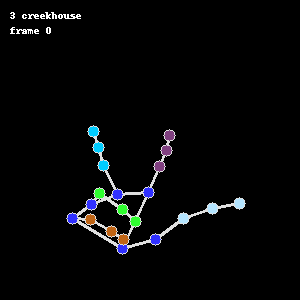

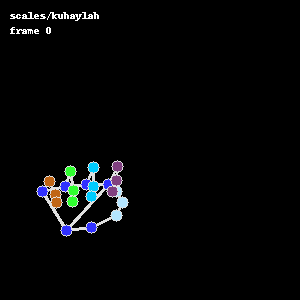

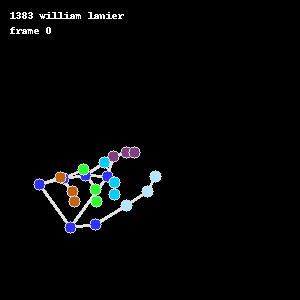

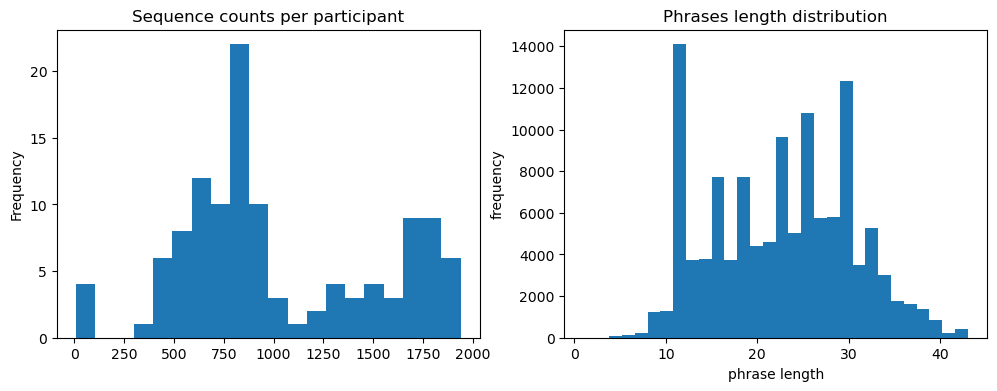

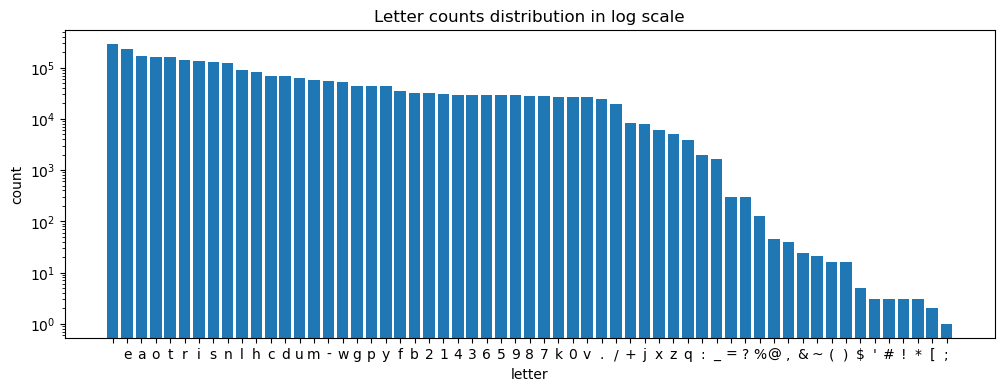

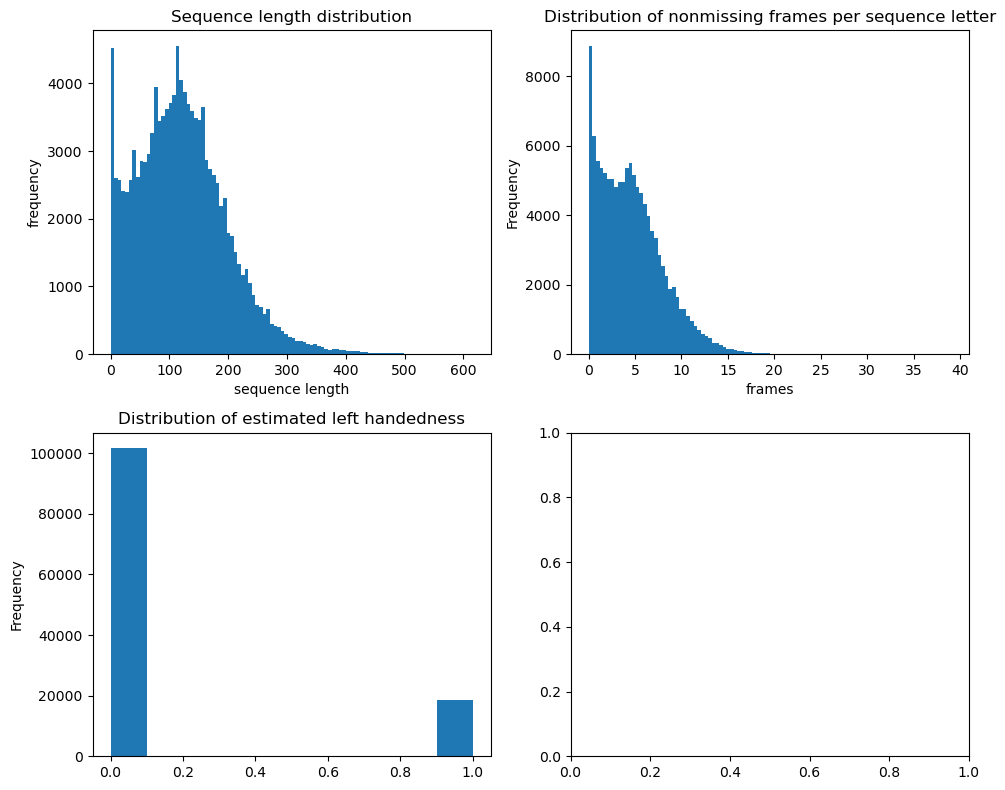

In [21]:
display_eda()

In [17]:
def get_theoretical_hand_edge_length(first_node:int, second_node:int):
    first_node, second_node = sorted([first_node, second_node])
    edge_lengths = {
        (0,1):32.5,
        (0,5):77.5,
        (0,9):70.0,
        (0,13):65.3,
        (0,17):64.3,
        (1,2):46.2,
        (1,5):63.0,
        (2,3):31.5,
        (3,4):21.7,
        (5,6):39.8,
        (5,9):25.5,
        (6,7):22.4,
        (7,8):15.8,
        (9,10):44.6,
        (9,13):18.9,
        (10,11):26.3,
        (11,12):17.4,
        (13,14):41.4,
        (13,17):18.4,
        (14,15):25.5,
        (15,16):17.3,
        (17,18):32.7,
        (18,19):18.1,
        (19,20):16.0,
    }
    edge_length = edge_lengths[(first_node, second_node)]
    return edge_length

class Finger(enum.Enum):
    thumb = 0
    index = 1
    middle = 2
    ring = 3
    little = 4
    
    def get_base_landmark_id(self) -> int:
        return 1 + 4 * self.value
    
    def get_landmark_ids(self) -> list[int]:
        base_landmark_id = self.get_base_landmark_id()
        landmark_ids = list(range(base_landmark_id, base_landmark_id + 4))
        return landmark_ids
    
    def get_default_phalanx_length(self, phalanx_id:int) -> float:
        phalanx_base_id = self.get_base_landmark_id() + phalanx_id
        phalanx_length = get_theoretical_hand_edge_length(phalanx_base_id, phalanx_base_id + 1)
        return phalanx_length

    def get_default_finger_x_axis(self) -> torch.Tensor:
        if self is Finger.thumb:
            return torch.tensor([1., 1, 1])
        else:
            return torch.tensor([0., 0, -1])
                
    def first_to_second_outer_joint_angle(self, first_angle:torch.Tensor) -> torch.Tensor:
        # TODO: precompute values, optimize
        if self is Finger.thumb:
            c = 0.05**2 / 0.9
            b = 2 / np.log(1 + 1/c)
            a = -1 - b * np.log(c)
            return (a + b * torch.log(first_angle / (torch.pi / 2) + c)) * (torch.pi / 2)
        else:
            return first_angle / 2

class Palm:
    @staticmethod
    def get_landmark_ids() -> list[int]:
        return [0, 1, 5, 9, 13, 17]
    
    @staticmethod
    def get_default_landmark_coordinates(one_z:float = -30.) -> torch.Tensor:
        edge = get_theoretical_hand_edge_length

        one_zero_five_angle = get_triangle_angle(edge(0, 1), edge(0, 5), edge(1, 5))
        five_zero_nine_angle = get_triangle_angle(edge(0, 5), edge(0, 9), edge(5, 9))
        five_zero_thirteen_angle = five_zero_nine_angle + get_triangle_angle(edge(0, 9), edge(0, 13), edge(9, 13))
        five_zero_seventeen_angle = five_zero_thirteen_angle + get_triangle_angle(edge(0, 13), edge(0, 17), edge(13, 17))

        five_y = edge(0, 5)

        one_x, one_y = get_x_y_projection(one_zero_five_angle, edge(0, 1))
        one_x = -one_x

        nine_x, nine_y = get_x_y_projection(five_zero_nine_angle, edge(0, 9))

        thirteen_x, thirteen_y = get_x_y_projection(five_zero_thirteen_angle, edge(0, 13))

        seventeen_x, seventeen_y = get_x_y_projection(five_zero_seventeen_angle, edge(0, 17))

        coordinates = torch.tensor([
            [0, 0, 0],
            [one_x, one_y, one_z],
            [0, five_y, 0],
            [nine_x, nine_y, 0],
            [thirteen_x, thirteen_y, 0],
            [seventeen_x, seventeen_y, 0],
        ], dtype=torch.float32)
        
        return coordinates


In [18]:
class ScreenProjectionLoss:
    def __init__(self, smooth_l1_loss_beta=0.1, zero_landmark_weight=10.):
        self.smooth_l1_loss = nn.SmoothL1Loss(beta=smooth_l1_loss_beta, reduction="none")
        self.weights = torch.ones(21)
        self.weights[0] = zero_landmark_weight
        
    def __call__(self, pred: torch.Tensor, target: torch.Tensor, frame_wise_reduction: tp.Literal["mean", "none"] ="mean")->torch.Tensor:
        pred_screen_projection = pred[:, :, [0, 1]]
        target_screen_projection = target[:, :, [0, 1]]
        loss = self.smooth_l1_loss(pred_screen_projection, target_screen_projection)
        loss *= self.weights.unsqueeze(-1)
        loss = loss.sum(dim=(1, 2))
        match frame_wise_reduction:
            case "mean":
                loss = loss.mean()
            case "none":
                pass
            case _:
                raise ValueError(f"Unknown frame wise reduction value: {frame_wise_reduction}")
        return loss
    
def temporal_delta_loss(sequence: torch.Tensor, smooth_l1_loss_beta:float=0.1, subsequence_ids:torch.Tensor | None=None)->torch.Tensor:
    loss = nn.functional.smooth_l1_loss(sequence[1:], sequence[:-1], beta=smooth_l1_loss_beta, reduction="none")
    if subsequence_ids is not None:
        loss[subsequence_ids - 1] = 0
    loss = loss.sum(dim=0).mean()
    loss /= smooth_l1_loss_beta
    return loss

In [19]:
# class HandModel(nn.Module):
#     def __init__(self, in_dim:int=21*3, out_dim:int=(1 + 3 + 3+ 3*5+3*5) ):
#         super().__init__()
        
#         phalanx_lengths = [[finger.get_default_phalanx_length(i) for i in range(3)] for finger in Finger]
#         self.phalanx_lengths = nn.Parameter(torch.tensor(phalanx_lengths))
#         self.palm = nn.Parameter(Palm.get_default_landmark_coordinates())
        
#         self.layers = nn.Sequential(
#             nn.Linear(in_dim, 100),
#             nn.SiLU(),
# #             nn.Linear(100, 100),
# #             nn.SiLU(),
#             nn.Linear(100, out_dim),
#         )
        
#     def forward(self, sequence:torch.Tensor) -> torch.Tensor:
#         sequence = torch.flatten(sequence, start_dim=1)
#         sequence = self.layers(sequence)
#         return sequence
        
#     def encode(self, sequence):
#         return self(sequence)
    
#     def decode(self, sequence):
#         scale = sequence[:, 0]
#         hand_position = sequence[:, 1:4]
#         rotation = sequence[:, 4:7]
#         finger_rotations = sequence[:, 7:22].reshape(-1, 5, 3)
#         finger_angles = sequence[:, 22:37].reshape(-1, 5, 3)
        
#         sequence = torch.zeros(len(sequence), 21, 3)
#         sequence[:, Palm.get_landmark_ids()] = self.palm
        
#         for finger in Finger:
#             finger_sequence = self.decode_finger(self.phalanx_lengths[finger.value], finger_angles[:, finger.value], finger_rotations[:, finger.value])
#             finger_base = sequence[:, [finger.get_base_landmark_id()]]
#             sequence[:, finger.get_landmark_ids()[1:]] = finger_sequence + finger_base
            
#         rotation = build_3d_rotation(rotation[:, 0], rotation[:, 1], rotation[:, 2])
#         sequence = rotate(rotation.unsqueeze(1), sequence)
#         sequence *= scale.reshape(-1, 1, 1)
#         sequence += hand_position.unsqueeze(1)
        
#         return sequence
        
#     def decode_finger(self, phalanx_lengths, finger_angles, finger_rotation):        
#         angle = finger_angles[:, 0].clone()
#         first_x, first_y = get_x_y_projection(angle, phalanx_lengths[0])
        
#         angle = angle + finger_angles[:, 1]
#         second_x, second_y = get_x_y_projection(angle, phalanx_lengths[1])
#         second_x += first_x
#         second_y += first_y
        
#         angle = angle + finger_angles[:, 2]
#         third_x, third_y = get_x_y_projection(angle, phalanx_lengths[2])
#         third_x += second_x
#         third_y += second_y
        
#         finger_sequence = torch.zeros(len(finger_angles), 3, 3)
        
#         finger_sequence[:, 0, 0] = first_x
#         finger_sequence[:, 0, 1] = first_y
#         finger_sequence[:, 1, 0] = second_x
#         finger_sequence[:, 1, 1] = second_y
#         finger_sequence[:, 2, 0] = third_x
#         finger_sequence[:, 2, 1] = third_y
        
#         rotation = build_3d_rotation(finger_rotation[:, 0], finger_rotation[:, 1], finger_rotation[:, 2])
#         finger_sequence = rotate(rotation.unsqueeze(1), finger_sequence)
        
#         return finger_sequence
        
    
class FingerModel(nn.Module):
    def __init__(
        self, finger: Finger, sequence: torch.Tensor, phalanx_lengths_requires_grad=False
    ):
        super().__init__()
        
        self.n_frames = len(sequence)
        self.finger = finger

        phalanx_lengths = [finger.get_phalanx_length(i) for i in range(3)]
        self.phalanx_lengths = nn.Parameter(torch.stack(phalanx_lengths), requires_grad=phalanx_lengths_requires_grad)
        
        finger_base, first_joint, second_joint, third_joint = finger.get_landmark_ids()
        base = normalize(sequence[:, finger_base] - sequence[:, 0])
        first = normalize(sequence[:, first_joint] - sequence[:, finger_base])
        second = normalize(sequence[:, second_joint] - sequence[:, first_joint])
        third = normalize(sequence[:, third_joint] - sequence[:, second_joint])
        
        # TODO: need better finger roll initialization
        self.finger_roll = nn.Parameter(torch.zeros(self.n_frames))
        self.finger_outer_angle = nn.Parameter(torch.arccos((base * first).sum(dim=-1)))
        self.first_outer_joint_angle = nn.Parameter(torch.arccos((first * second).sum(dim=-1)))
    
    def forward(self) -> torch.Tensor:

        finger_outer_angle = torch.clamp(self.finger_outer_angle, -torch.pi/2, torch.pi/2)
        first_outer_joint_angle = torch.clamp(
            self.first_outer_joint_angle,
            min=self.finger.get_min_first_outer_joint_angle(),
            max=self.finger.get_max_first_outer_joint_angle(),
        )
        second_outer_joint_angle = self.finger.first_to_second_outer_joint_angle(first_outer_joint_angle)
        
        angle = finger_outer_angle.clone()
        first_x, first_y = get_x_y_projection(angle, self.phalanx_lengths[0])
        
        angle = angle + first_outer_joint_angle
        second_x, second_y = get_x_y_projection(angle, self.phalanx_lengths[1])
        second_x += first_x
        second_y += first_y
        
        angle = angle + second_outer_joint_angle
        third_x, third_y = get_x_y_projection(angle, self.phalanx_lengths[2])
        third_x += second_x
        third_y += second_y
        
        finger_sequence = torch.zeros(self.n_frames, 3, 3)
        
        finger_sequence[:, 0, 0] = first_x
        finger_sequence[:, 0, 1] = first_y
        finger_sequence[:, 1, 0] = second_x
        finger_sequence[:, 1, 1] = second_y
        finger_sequence[:, 2, 0] = third_x
        finger_sequence[:, 2, 1] = third_y
        
        finger_roll = torch.clamp(self.finger_roll, -torch.pi/2, torch.pi/2)
        rotation = build_x_axis_3d_rotation(finger_roll)
        finger_sequence = rotate(rotation.unsqueeze(1), finger_sequence)
        
        return finger_sequence

In [112]:
hm = HandModel()
en = hm.encode(sequence)
hm.decode(en).shape

torch.Size([69, 21, 3])

In [122]:
hm = HandModel()
screen_projection_loss = ScreenProjectionLoss()
# optimizer = torch.optim.SGD(params=hm.parameters(), lr=1e-3, momentum=0.9)
optimizer = torch.optim.Adam(params=hm.parameters())

for _ in range(100):
    optimizer.zero_grad()
    pred = hm.decode(hm.encode(sequence))
    loss = screen_projection_loss(pred=pred, target=sequence)
    loss.backward()
    optimizer.step()

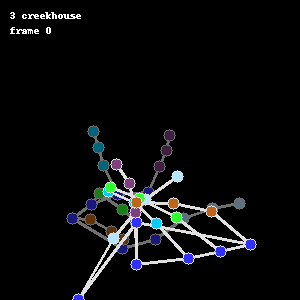

In [123]:
display_video(draw_progress_bar_and_captions(video=draw_sequence_landmarks_in_the_background(
    foreground_sequence=pred,
    background_sequence=sequence,
),
                                             phrase=phrase))

In [ ]:
# class HandModel(nn.Module):
#     def __init__(self, 
#                  sequence:torch.Tensor, 
#                  palm_requires_grad=False, 
#                  phalanx_lengths_requires_grad=False,
#                  finger_x_axis_requires_grad=False,
#                 ):
#         super().__init__()
        
#         self.sequence = sequence
#         self.n_frames = len(sequence)
        
#         self.hand_position = nn.Parameter(sequence[:, [0]])
#         self.five_direction = nn.Parameter(sequence[:, 5] - sequence[:, 0])
#         self.seventeen_direction = nn.Parameter(sequence[:, 17] - sequence[:, 0])
#         self.scale = nn.Parameter((sequence[:, 0] - sequence[:, 5]).norm(dim=-1) / get_theoretical_hand_edge_length(0, 5))
#         palm = torch.stack([Palm.get_landmark_coordinates(i) for i in Palm.get_landmark_ids()])
#         self.palm = nn.Parameter(palm, requires_grad=palm_requires_grad)
#         finger_models = [
#             FingerModel(
#                 finger=finger,
#                 sequence=sequence,
#                 phalanx_lengths_requires_grad=phalanx_lengths_requires_grad
#             )
#             for finger in Finger
#         ]
#         self.finger_models = nn.ParameterList(finger_models)
#         finger_x_axes = [finger.get_finger_x_axis() for finger in Finger]
#         self.finger_x_axes = nn.Parameter(torch.stack(finger_x_axes), requires_grad=finger_x_axis_requires_grad)
        
#     def forward(self):
#         sequence = torch.zeros(self.n_frames, 21, 3)
        
#         sequence[:, Palm.get_landmark_ids()] = self.palm
#         sequence[:, Palm.get_base_landmark_id()] = 0
        
#         for finger_model, finger_x_axis in zip(self.finger_models, self.finger_x_axes):
        
#             finger_sequence = finger_model()
            
#             finger_base_landmark = finger_model.finger.get_base_landmark_id()
            
#             x = normalize(finger_x_axis)
#             y = sequence[0, finger_base_landmark] - sequence[0, 0]
#             y = normalize(y - x * (y * x).sum(dim=-1, keepdim=True))
#             z = torch.cross(x, y)
#             rotation = torch.stack([x, y, z], dim=-1)
#             finger_sequence = rotate(rotation.unsqueeze(0).unsqueeze(0), finger_sequence) # express this rotation as euler angles
            
#             finger_sequence += sequence[:, [finger_base_landmark]]
#             sequence[:, finger_model.finger.get_landmark_ids()[1:]] = finger_sequence
            
#         rotation = get_3d_rotation(
#             y_axis_image_direction=self.five_direction,
#             z_axis_image_direction=get_plane_normal(self.seventeen_direction, self.five_direction),
#         )
#         sequence = rotate(rotation.unsqueeze(1), sequence)
#         sequence *= self.scale.reshape(-1, 1, 1)
#         sequence += self.hand_position
        
#         self.scale.register_hook(lambda grad: torch.clamp(grad, -1e-3, 1e-3))
        
#         return sequence
    
#     def fit(self, n_iters:int = 100):
#         screen_projection_loss = ScreenProjectionLoss()
#         optimizer = torch.optim.SGD(params=self.parameters(), lr=1e-3, momentum=0.9)
        
#         for _ in range(n_iters):
#             optimizer.zero_grad()
#             loss = 100 * screen_projection_loss(pred=self(), target=self.sequence)
#             loss.backward()
#             optimizer.step()
        
#         return self
    
#     def get_parameters(self):
#         parameters = torch.cat([
#             self.hand_position[:, 0],
#             self.five_direction,
#             self.seventeen_direction,
#             self.scale[:, None],
#         ] + [fm.finger_roll[:, None] for fm in self.finger_models]
#             + [fm.finger_outer_angle[:, None] for fm in self.finger_models]
#             + [fm.first_outer_joint_angle[:, None] for fm in self.finger_models],
#             dim=1,
#         )
#         return parameters
    
# #     def fit(self, subsequence_ids:torch.Tensor | None=None, n_iters:int = 100):
# #         screen_projection_loss = ScreenProjectionLoss()
# #         optimizer = torch.optim.Adam(params=self.parameters())
        
# #         for _ in tqdm.tqdm(range(n_iters), disable=not is_debugging()):
# #             optimizer.zero_grad()

# #             pred_sequence = self()

# #             loss = 100 * screen_projection_loss(pred=pred_sequence, target=self.sequence)
            
# #             loss += temporal_delta_loss(self.hand_position)
# #             loss += temporal_delta_loss(self.five_direction)
# #             loss += temporal_delta_loss(self.seventeen_direction)
# #             loss += temporal_delta_loss(self.scale, 1e-2)
# #             for finger_model in self.finger_models:
# #                 loss += temporal_delta_loss(finger_model.first_phalanx_direction, 1.0)
# #                 loss += temporal_delta_loss(finger_model.first_outer_joint_angle, 1.0)

# #             loss.backward()
# #             optimizer.step()
        
# #         return self

# def extract_hand_parameters(sequence):
#     hand_model = HandModel(sequence)
#     hand_model.fit()
#     parameters = hand_model.get_parameters()
#     return parameters

In [180]:
# TODO: fit phalanx lengths, palm coordinates, finger x axes directions, better initialize finger roll, 
# visualize resulting params, add such hand parameters as relative finger point coordinates,
# add temporal loss, find optimal optimizer, speed up.

# def check_batched_sequence_shape(sequence: torch.Tensor):
#     if len(sequence.shape) != 4:
#         raise ValueError(
#             f"Expected batched sequence to have shape: "
#             f"[batch, frame, landmark, coordinate], got {sequence.shape}."
#         )
        
# def check_batched_mask_shape(mask:torch.Tensor | None):
#     if mask is not None and len(mask.shape) != 2:
#         raise ValueError(f"Expected batched mask to have shape: [batch, frame], got {mask.shape}.")

# hand_model = HandModel(
#     sequence=sequence,
#     palm_requires_grad=True,
#     phalanx_lengths_requires_grad=True,
#     finger_x_axis_requires_grad=True
# )
# screen_projection_loss = ScreenProjectionLoss()
# # optimizer = torch.optim.Adam(params=hand_model.parameters(), lr=1e-4)
# optimizer = torch.optim.SGD(params=hand_model.parameters(), lr=1e-3, momentum=0.9)

# losses = []
# scale = []
# hand_position = []
# palm = []
# x_axis = []
# for _ in tqdm.tqdm(range(100)):
# #     print(_)
#     optimizer.zero_grad()

#     pred_sequence = hand_model()

#     loss = 100 * screen_projection_loss(pred=pred_sequence, target=sequence, frame_wise_reduction='none')
    
#     losses.append(loss.detach().clone())
#     scale.append(hand_model.scale.detach().clone())
#     hand_position.append(hand_model.hand_position.detach().clone())
#     palm.append(hand_model.palm.detach().clone())
#     x_axis.append(hand_model.finger_x_axes.detach().clone())
    
#     loss = loss.mean()

# #     loss += temporal_delta_loss(hand_model.hand_position, subsequence_ids=...)
# #     loss += temporal_delta_loss(hand_model.five_direction)
# #     loss += temporal_delta_loss(hand_model.seventeen_direction)
# #     loss += temporal_delta_loss(hand_model.scale, 1e-2)
# #     for finger_model in hand_model.finger_models:
# #         loss += temporal_delta_loss(finger_model.first_phalanx_direction, 1.0)
# #         loss += temporal_delta_loss(finger_model.first_outer_joint_angle, 1.0)

#     loss.backward()
# #     nn.utils.clip_grad_norm_(hand_model.parameters(), 1.0)
#     optimizer.step()

# plt.plot([i.mean() for i in losses])
# plt.plot([i[-1][-1] for i in x_axis])
# plt.plot([i.max() for i in scale])
# plt.plot(losses[-1])
# plt.plot([i[1][2] for i in palm])

# display_video(draw_progress_bar_and_captions(video=draw_sequence_landmarks_in_the_background(
#     foreground_sequence=hand_model(),
#     background_sequence=sequence,
# ), phrase=phrase))


# landmark_lists = build_normalized_landmark_lists(hand_model())
# landmark_list = landmark_lists[0]
# connections = Bodypart.right_hand.get_landmark_connections()

# figsize = (6, 6)
# elevation = 10
# azimuth = 10

# plt.figure(figsize=figsize)
# ax = plt.axes(projection="3d")
# ax.view_init(elev=elevation, azim=azimuth)
# plotted_landmarks = {}

# for idx, landmark in enumerate(landmark_list.landmark):
#     ax.scatter3D(
#         xs=[-landmark.z],
#         ys=[landmark.x],
#         zs=[-landmark.y],
#         color="red",
#         linewidth=5,
#     )
#     plotted_landmarks[idx] = (-landmark.z, landmark.x, -landmark.y)

# for connection in connections:
#     start_idx = connection[0]
#     end_idx = connection[1]
#     landmark_pair = [
#         plotted_landmarks[start_idx], plotted_landmarks[end_idx]
#     ]
#     ax.plot3D(
#         xs=[landmark_pair[0][0], landmark_pair[1][0]],
#         ys=[landmark_pair[0][1], landmark_pair[1][1]],
#         zs=[landmark_pair[0][2], landmark_pair[1][2]],
#         color="black",
#         linewidth=5,
#     )
    
# # ax.plot_surface(x, y, z, alpha=0.3)

In [59]:
meta_df = read_aggregated_meta_dataframe()
hand_df = read_aggregated_hand_dataframe()

In [60]:
# Use minimal preprocessing and simple model as baseline, then try to extract features and evaluate the difference.

In [61]:
participant_id = meta_df["participant_id"].unique()[0]
participant_sequence_ids =  meta_df[(meta_df["not_na_frames_per_letter"] > 1) & (meta_df["participant_id"] == participant_id)].index
participant_hand_df = hand_df.loc[participant_sequence_ids]
_, unique_index = np.unique(participant_hand_df.index, return_index=True)
unique_index.sort()
unique_index = torch.tensor(unique_index)
sequence = participant_hand_df[get_all_bodypart_columns(Bodypart.right_hand)].values
sequence = torch.tensor(sequence.reshape(-1, 21, 3))
sid = 0
sequence = sequence[:unique_index[sid + 1]]
phrase = meta_df.loc[participant_sequence_ids]["phrase"].iloc[sid]

In [62]:
sequence.shape

torch.Size([69, 21, 3])

In [181]:
# TODO: fit transformer: encode hand parameters, use it as context for decoder

In [ ]:
# class VideoCallback(pl.callbacks.Callback):
#     def on_validation_batch_start(
#         self, trainer, pl_module, batch, batch_index, dataloader_index=0
#     ):
#         if batch_index == 0:
#             i = 0
#             sequence_id = batch["sequence_id"][i].item()
#             pred_sequence = pl_module(batch["sequence"])
#             pred_sequence = pred_sequence[i, : batch["size"][i]]
#             pred_sequence = pred_sequence.detach().numpy()
#             video = draw_sequence_landmarks(
#                 sequence=pred_sequence,
#                 sequence_id=sequence_id,
#                 bodypart=Bodypart.right_hand,
#             )
#             with tempfile.NamedTemporaryFile(suffix=".gif") as gif:
#                 filename = gif.name
#                 write_gif(filename, video)
#                 wandb.log({"video": wandb.Video(filename)})
                

## Metrics <span id=Metrics_></span>

In [ ]:
def get_edit_distance(first: str, second: str) -> int:
    edit_distance = editdistance.distance(first, second)
    return edit_distance

## Hand model <span id=Hand_model_></span>

<div style="text-align: center;">
  <img src="media/hand-landmarks-with-bone-lengths.png" width="500">
</div>

## Hand model loss <span id=Hand_model_loss_></span>

In [ ]:
# because videos are from a phone, the perspective is skewed and bones do not necessarily have invariant proportions
# augmentations: concat several sequences
# check out different scipy interpolation methods and respective losses
# set up wandb logger
# log each loss separately, check losses on sklearn interpolators
# augmentations
# scale loss inverse according to fraction of missing frames

## Dataset <span id=Dataset_></span>

## Model <span id=Model_></span>

In [ ]:
class HandModelInterpolator(nn.Module):
    def __init__(self, window_size: int = 11):
        super().__init__()
        self.conv1d = nn.Conv1d(
            in_channels=63, out_channels=63, kernel_size=window_size, padding="same"
        )

    def forward(self, sequence):
        sequence = torch.flatten(sequence, start_dim=-2, end_dim=-1)
        sequence = sequence.transpose(1, 2)  # batch, landmark x coordinate, frame
        sequence = sequence + 1e-5 * self.conv1d(sequence)
        sequence = sequence.transpose(1, 2)
        sequence = torch.unflatten(sequence, dim=-1, sizes=(-1, 3))
        return sequence

In [ ]:
class Module(pl.LightningModule):
    def __init__(self, hand_model: HandModel):
        super().__init__()
        self.hand_model = hand_model

    def forward(self, sequence):
        pred_sequence = self.interpolator(sequence)
        return pred_sequence

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

    def training_step(self, batch, batch_index):
        sequence = batch["sequence"]
        mask = batch["mask"]
        pred_sequence = self(sequence)

        bone_length_variation_loss = 0.0
        finger_plane_loss = 0.0
        motion_smoothness_loss = 0.0
        distance_from_true_sequence_loss = 0.0
        for s, p, m in zip(sequence, pred_sequence, mask):
            bone_length_variation_loss += get_bone_length_variation_loss(p)
            finger_plane_loss += 1000 * get_finger_plane_loss(p)
            #             motion_smoothness_loss += get_motion_smoothness_loss(p)
            distance_from_true_sequence_loss += (
                1000 * get_distance_from_true_sequence_loss(s, p, m)
            )

        loss = (
            bone_length_variation_loss
            + finger_plane_loss
            + motion_smoothness_loss
            + distance_from_true_sequence_loss
        )

        self.log("bone_length_variation_loss", bone_length_variation_loss)
        self.log("finger_plane_loss", finger_plane_loss)
        self.log("motion_smoothness_loss", motion_smoothness_loss)
        self.log("distance_from_true_sequence_loss", distance_from_true_sequence_loss)
        self.log("loss", loss)

        return loss


In [ ]:
train_dataloader, val_dataloader, test_dataloader = next(
    iter(
        get_stratified_k_fold_dataloaders(
            get_stratified_k_fold_sequences(
                sequence_ids=train[train["not_na_frames_per_letter"] > 1].index.values
            ),
            num_workers=4,
        )
    )
)
model = Module(window_size=11)
trainer = pl.Trainer(
    logger=pl.loggers.WandbLogger(project="asl-fingerspelling"),
    callbacks=[VideoCallback()],
    log_every_n_steps=10,
    val_check_interval=1000,
    limit_val_batches=1,
)
trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)
wandb.finish()